In [25]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams.update({'font.size': 22})

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,RO,OCCTIME,EFFECTDATE,MERCNAME,TRANAMT,TRANNAME,TRANCODE,CARDBAL,JDESC,JNUM,MACCOUNT,F1,F2,F3,SYSCODE,POSCODE
0,1,2019-10-05 11:27:12,2019-10-05 11:24:11,学一食堂主食1组（西厅）,-6.0,持卡人消费,15,225.13,NaN,3279188625,1000100.0,1,11,2,18,10
1,2,2019-10-05 07:07:31,2019-10-05 07:04:26,学一食堂副食组,-1.0,持卡人消费,15,231.13,NaN,3279186396,1000102.0,1,11,2,18,16
2,3,2019-10-05 07:07:20,2019-10-05 07:04:26,学一食堂副食组,-1.6,持卡人消费,15,232.13,NaN,3279186394,1000102.0,1,11,2,18,21
3,4,2019-10-04 17:33:33,2019-10-04 17:30:15,学一水果/熟食/饮料,-2.9,持卡人消费,15,233.73,NaN,3279184072,1000110.0,1,11,2,18,36
4,5,2019-10-04 17:22:56,2019-10-04 17:20:08,学一食堂主食1组（东厅）,-5.0,持卡人消费,15,236.63,NaN,3279183753,1000101.0,1,11,2,18,27


In [4]:
del df['RO']
del df['EFFECTDATE']
del df['TRANCODE']
del df['JDESC']
del df['JNUM']
del df['MACCOUNT']
del df['F1']
del df['F2']
del df['F3']
del df['SYSCODE']
df = df.iloc[::-1]

In [5]:
df.head()

,OCCTIME,MERCNAME,TRANAMT,TRANNAME,CARDBAL,POSCODE
161,2019-08-17 11:20:36,NaN,100.0,支付宝转账,0.0,34
160,2019-08-17 11:36:27,新学五面食,-5.0,持卡人消费,295.0,6
159,2019-08-17 11:36:27,NaN,300.0,补助流水,300.0,6
158,2019-08-17 11:41:37,新学五面食,-4.8,持卡人消费,290.2,5
157,2019-08-17 11:43:21,新学五中餐,-7.0,持卡人消费,283.2,17


In [6]:
df.describe()

,TRANAMT,CARDBAL,POSCODE
count,162.000000,162.000000,162.000000
mean,6.858827,130.112654,18.197531
std,42.718793,88.878057,8.849213
min,-23.300000,0.000000,1.000000
25%,-7.150000,64.522500,16.000000
50%,-5.350000,103.510000,19.000000
75%,-2.500000,184.025000,22.000000
max,300.000000,343.730000,36.000000


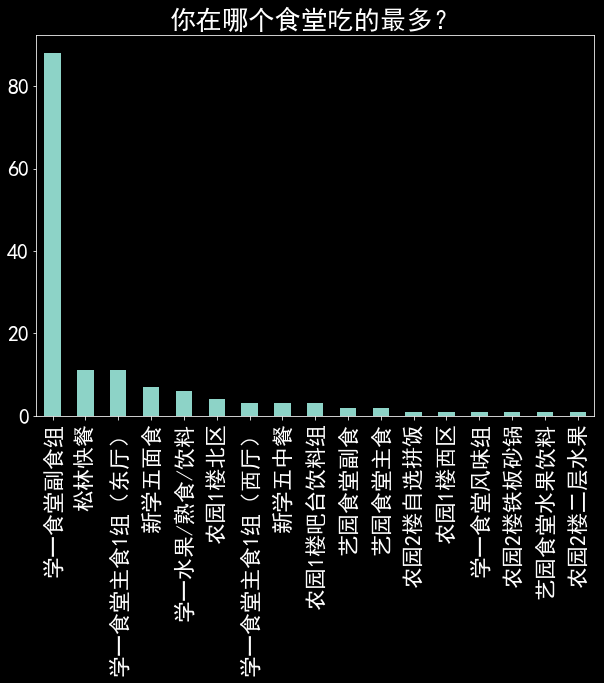

In [26]:
df['MERCNAME'].value_counts().plot.bar(title='你在哪个食堂吃的最多？')

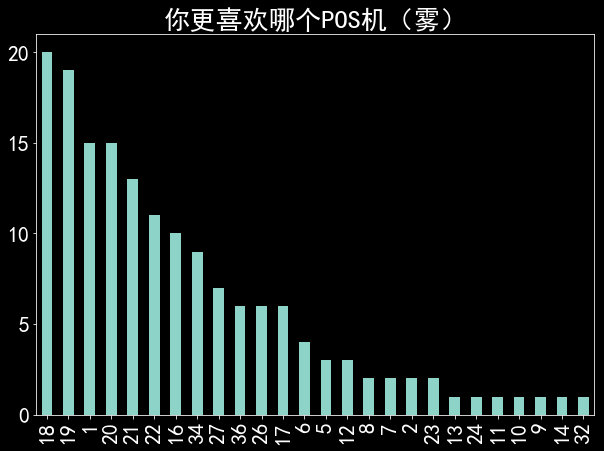

In [27]:
df['POSCODE'].value_counts().plot.bar(title='你更喜欢哪个POS机（雾）')

#### Let's play with the data!

In [9]:
import datetime as dt

In [10]:
df['OCCTIME'][1]

'2019-10-05 07:07:31'

In [11]:
dt.datetime.strptime(df['OCCTIME'][1], '%Y-%m-%d %H:%M:%S').date()

datetime.date(2019, 10, 5)

In [12]:
def get_datetime(occtime):
    return dt.datetime.strptime(occtime, '%Y-%m-%d %H:%M:%S')

In [13]:
def get_type(occtime):
    time = occtime.time()
    if time < dt.time(9, 0):
        return 'B'  # Breakfast
    if time < dt.time(13, 0):
        return 'L'  # Lauch
    return 'S'  # Supper

In [14]:
TYPE_ZH = {
    'B': '早饭',
    'L': '中饭',
    'S': '晚饭'
}

In [15]:
df['OCCTIME'] = df['OCCTIME'].apply(get_datetime)
df['OCCDATE'] = df['OCCTIME'].apply(lambda d: d.date())
df['TYPE'] = df['OCCTIME'].apply(get_type)
df['TRANABS'] = df['TRANAMT'].apply(abs)

In [16]:
df.sample(10)

,OCCTIME,MERCNAME,TRANAMT,TRANNAME,CARDBAL,POSCODE,OCCDATE,TYPE,TRANABS
23,2019-09-29 17:45:24,NaN,200.00,支付宝转账,143.73,34,2019-09-29,S,200.00
44,2019-09-25 07:02:26,学一食堂主食1组（东厅）,-2.50,持卡人消费,38.83,26,2019-09-25,B,2.50
94,2019-09-11 17:20:49,NaN,86.00,补助流水,117.24,16,2019-09-11,S,86.00
81,2019-09-15 17:52:39,学一食堂副食组,-6.65,持卡人消费,149.88,17,2019-09-15,S,6.65
30,2019-09-28 12:14:03,学一食堂副食组,-6.95,持卡人消费,67.38,20,2019-09-28,L,6.95
27,2019-09-29 11:40:00,学一食堂主食1组（东厅）,-5.00,持卡人消费,50.73,27,2019-09-29,L,5.00
37,2019-09-26 17:34:53,学一水果/熟食/饮料,-2.90,持卡人消费,2.03,36,2019-09-26,S,2.90
9,2019-10-03 11:22:42,学一食堂副食组,-6.65,持卡人消费,266.48,20,2019-10-03,L,6.65
79,2019-09-16 12:22:26,学一食堂副食组,-5.95,持卡人消费,137.73,20,2019-09-16,L,5.95
157,2019-08-17 11:43:21,新学五中餐,-7.00,持卡人消费,283.20,17,2019-08-17,L,7.00


In [17]:
df.OCCTIME[0]

Timestamp('2019-10-05 11:27:12')

In [18]:
cost = df.loc[pd.notnull(df.MERCNAME)]
cost.head()

,OCCTIME,MERCNAME,TRANAMT,TRANNAME,CARDBAL,POSCODE,OCCDATE,TYPE,TRANABS
160,2019-08-17 11:36:27,新学五面食,-5.0,持卡人消费,295.0,6,2019-08-17,L,5.0
158,2019-08-17 11:41:37,新学五面食,-4.8,持卡人消费,290.2,5,2019-08-17,L,4.8
157,2019-08-17 11:43:21,新学五中餐,-7.0,持卡人消费,283.2,17,2019-08-17,L,7.0
156,2019-08-17 16:39:54,农园1楼北区,-23.3,持卡人消费,259.9,13,2019-08-17,S,23.3
155,2019-08-17 16:51:37,农园1楼吧台饮料组,-2.3,持卡人消费,257.6,1,2019-08-17,S,2.3


In [19]:
cost[10:20]

,OCCTIME,MERCNAME,TRANAMT,TRANNAME,CARDBAL,POSCODE,OCCDATE,TYPE,TRANABS
149,2019-08-18 17:52:45,农园1楼吧台饮料组,-7.0,持卡人消费,208.15,1,2019-08-18,S,7.0
148,2019-08-19 07:15:25,学一食堂副食组,-5.2,持卡人消费,202.95,16,2019-08-19,B,5.2
147,2019-08-19 07:16:33,学一食堂副食组,-2.5,持卡人消费,200.45,22,2019-08-19,B,2.5
146,2019-08-19 11:19:32,农园2楼自选拼饭,-7.5,持卡人消费,192.95,34,2019-08-19,L,7.5
145,2019-08-19 11:32:35,农园2楼二层水果,-1.2,持卡人消费,191.75,27,2019-08-19,L,1.2
144,2019-08-19 18:29:49,新学五面食,-1.6,持卡人消费,190.15,5,2019-08-19,S,1.6
143,2019-08-20 07:38:09,学一食堂副食组,-5.5,持卡人消费,184.65,21,2019-08-20,B,5.5
142,2019-08-20 07:38:31,学一食堂副食组,-2.5,持卡人消费,182.15,22,2019-08-20,B,2.5
141,2019-08-20 11:33:46,新学五面食,-5.0,持卡人消费,177.15,7,2019-08-20,L,5.0
140,2019-08-20 17:12:40,新学五中餐,-12.0,持卡人消费,165.15,21,2019-08-20,S,12.0


(array([737293., 737300., 737303., 737310., 737317., 737324., 737331.,
        737333.]), <a list of 8 Text xticklabel objects>)

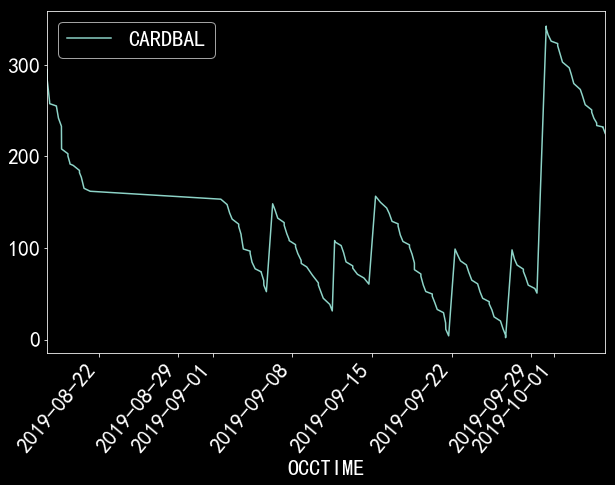

In [28]:
cost.plot(x='OCCTIME', y='CARDBAL')
plt.xticks(rotation=50)

In [21]:
cost_day = cost.groupby(cost['OCCDATE']).aggregate({
    'TRANABS': 'sum'
})
cost_day.head()

,TRANABS
OCCDATE,
2019-08-17,42.40
2019-08-18,49.45
2019-08-19,18.00
2019-08-20,25.00
2019-08-21,3.20


(array([737293., 737300., 737303., 737310., 737317., 737324., 737331.,
        737333.]), <a list of 8 Text xticklabel objects>)

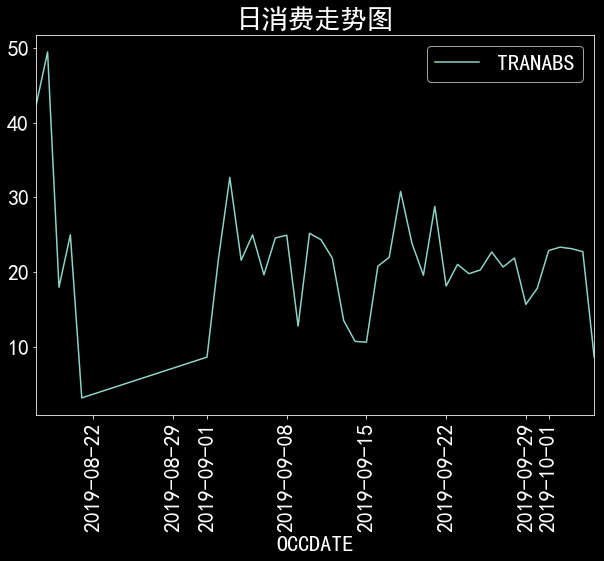

In [29]:
cost_day.plot(title='日消费走势图')
plt.xticks(rotation=90)

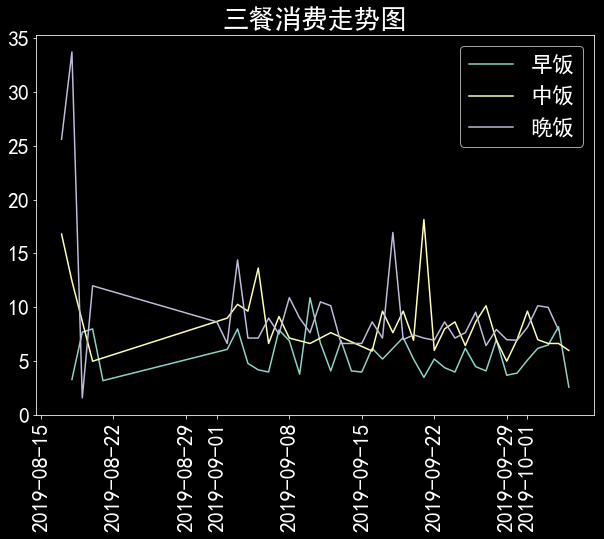

In [30]:
f, ax = plt.subplots()
ax.set_title('三餐消费走势图')
for i in ('B', 'L', 'S'):
    ci = cost.loc[cost.TYPE == i]
    ci = ci.groupby(cost['OCCDATE']).aggregate({
        'TRANABS': 'sum'
    })
    line, = ax.plot(ci.index, ci.TRANABS, label=TYPE_ZH[i])
    ax.legend()
plt.xticks(rotation=90)
plt.show()

#### 但是为什么会有神奇的零点？
因为。。我早饭会刷两次！ \[Facepalm\]
#### 为什么改完之后还有？
Emmmm 我也不知道。工作人员打错了？